# 数据分析实操专题练习-Numpy
---

**习题说明：**

- 练习时间：6小时
- 练习环境：jupyter notebook
- 练习要求：所有操作命令或代码均在此notebook文件中编写，完整的Python程序可新建为扩展名为.py的文本文件，然后在本notebook中使用命令或者以引入模块的方式调用执行。程序运行结果必须在此notebook中输出，具体输出方法可见题目中的**操作说明**。

## 数据预处理与可视化

### 数据描述

高校学生入学成绩数据分为4个数据文件，分别为：

- 班级信息表（data/班级信息表.txt）
- 学生信息表（data/学生信息表.txt）
- 院系信息表（data/院系信息表.txt）
- 学生成绩表（data/学生成绩表.txt）


### 题目要求

请使用**numpy**编程完成以下操作任务。【注：只能使用numpy和matplotlib，禁止使用第三方工具包】

#### 第1题（难易程度：* ）

分别导入上述数据文件，完成以下操作：

1. 输出每个数据表的行列数（形状）和头5行

In [5]:
# 导入必需包
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 加载班级信息表
classes_info = np.loadtxt('data/班级信息表.txt', delimiter=',', dtype='str')
print('行列数：', classes_info.shape)
classes_info[:5]

行列数： (59, 4)


array([['班级编号', '班级名称', '入学日期', '所属院系中文名'],
       ['0101', '计算机一班', '20170901', '计算机学院'],
       ['0102', '计算机二班', '20170901', '计算机学院'],
       ['0103', '计算机三班', '20170901', '计算机学院'],
       ['0104', '智能科学一班', '20170901', '计算机学院']], dtype='<U9')

In [7]:
# 加载学生信息表
students_info = np.loadtxt('data/学生信息表.txt', delimiter=',', dtype='str')
print('行列数：', students_info.shape)
students_info[:5]

行列数： (761, 5)


array([['学号', '姓名', '性别', '所属班级编号', '入学日期'],
       ['170401011001', '施礼义', '男', '0101', '20170901'],
       ['170401011002', '王旭', '男', '0101', '20170901'],
       ['170401011003', '肖桢', '女', '0101', '20170901'],
       ['170401011004', '吴佩东', '男', '0101', '20170901']], dtype='<U12')

In [8]:
# 加载院系信息表
departments_info = np.loadtxt('data/院系信息表.txt', delimiter=',', dtype='str')
print('行列数：', departments_info.shape)
departments_info[:5]

行列数： (96, 2)


array([['院系编号', '院系名称'],
       ['01', '计算机学院'],
       ['01', '计算机学院'],
       ['01', '计算机学院'],
       ['01', '计算机学院']], dtype='<U8')

In [9]:
# 加载学生成绩表
students_scores = np.loadtxt('data/学生成绩表.txt', delimiter=',', dtype=str)
print('行列数：', students_scores.shape)
students_scores[:5]

行列数： (128, 5)


array([['学号', '姓名', '性别', '所属班级编号', '入学成绩'],
       ['170401011001 ', '施礼义', '男', '0101', '467'],
       ['170401011002 ', '王旭', '男', '0101', '518'],
       ['170401011003 ', '肖桢', '女', '0101', '509'],
       ['170401011004 ', '吴佩东', '男', '0101', '508']], dtype='<U13')

2. 去除院系信息表和学生信息表中的重复行，去重后的数据分别保存为"院系信息表-1.csv"和"学生信息表-1.csv"文件

In [10]:
departments_info = np.vstack((departments_info[0], np.unique(departments_info[1:], axis=0)))
departments_info

array([['院系编号', '院系名称'],
       ['01', '计算机学院'],
       ['02', '经济管理学院'],
       ['03', '软件与微电子学院'],
       ['04', '信息科学技术学院']], dtype='<U8')

3. 去除学生成绩表中存在的空白字符

In [11]:
students_scores = np.char.strip(students_scores)
students_scores[:5]

array([['学号', '姓名', '性别', '所属班级编号', '入学成绩'],
       ['170401011001', '施礼义', '男', '0101', '467'],
       ['170401011002', '王旭', '男', '0101', '518'],
       ['170401011003', '肖桢', '女', '0101', '509'],
       ['170401011004', '吴佩东', '男', '0101', '508']], dtype='<U13')

In [12]:
np.savetxt('院系信息表-1.csv', departments_info, fmt='%s', delimiter=',')
!cat 院系信息表-1.csv

院系编号,院系名称
01,计算机学院
02,经济管理学院
03,软件与微电子学院
04,信息科学技术学院


#### 第2题（难易程度：* ）

1. 将学生成绩表按列划分为两个表，分别为**学生基本信息表**（学号，姓名，性别，所属班级编号）和**学号成绩表**（学号，入学成绩），分别保存为"学生基本信息表-2.csv"和"学号成绩表-2.csv"

In [13]:
# 学生基本信息表
students_basic_info = students_scores[:, 0:4]
np.savetxt('学生基本信息表-3.csv', students_basic_info, fmt='%s', delimiter=',')
!cat 学生基本信息表-3.csv | head -n 10

学号,姓名,性别,所属班级编号
170401011001,施礼义,男,0101
170401011002,王旭,男,0101
170401011003,肖桢,女,0101
170401011004,吴佩东,男,0101
170401011005,魏会,男,0101
170401011006,曾美,女,0101
170401011007,邵亚,女,0101
170401011008,朱燕菊,女,0101
170401011009,杨明书,男,0101


In [14]:
# 学号成绩表
id_scores = students_scores[:, [0, 4]]
np.savetxt('学号成绩表-3.csv', id_scores, fmt='%s', delimiter=',')
!cat 学号成绩表-3.csv | head -n 10

学号,入学成绩
170401011001,467
170401011002,518
170401011003,509
170401011004,508
170401011005,494
170401011006,500
170401011007,490
170401011008,466
170401011009,534


2. 将学生信息表拆分为两个表，分别为学生基本信息表2（学号，姓名，性别，所属班级编号）和入学日期表（学号，入学日期），分别保存为"学生基本信息表-2-2.csv"和"入学日期表-2.csv"

In [15]:
# 学生基本信息表2
students_basic_info2 = students_info[:, 0:4]
np.savetxt('学生基本信息表-2-2.csv', students_basic_info2, fmt='%s', delimiter=',')
!cat 学生基本信息表-2-2.csv | head -n 10

学号,姓名,性别,所属班级编号
170401011001,施礼义,男,0101
170401011002,王旭,男,0101
170401011003,肖桢,女,0101
170401011004,吴佩东,男,0101
170401011005,魏会,男,0101
170401011006,曾美,女,0101
170401011007,邵亚,女,0101
170401011008,朱燕菊,女,0101
170401011009,杨明书,男,0101


In [16]:
# 入学日期表
id_dates = students_info[:, [0, 4]]
np.savetxt('入学日期表-2.csv', id_dates, fmt='%s', delimiter=',')
!cat 入学日期表-2.csv | head -n 10

学号,入学日期
170401011001,20170901
170401011002,20170901
170401011003,20170901
170401011004,20170901
170401011005,20170901
170401011006,20170901
170401011007,20170901
170401011008,20170901
170401011009,20170901


3. 将**学生基本信息表**，**入学日期表**和**学号成绩表**合并为**学生入学成绩表**，忽略没有对应成绩的行，并保存为"学生入学成绩表-2.csv"

In [17]:
# 查看这些表的行数
len(students_basic_info), len(id_dates), len(id_scores)

(128, 761, 128)

In [18]:
# 确保学号匹配
# 这里使用数据本身的特点（三个表前128行的学号正好一一对应），可以考虑使用更为通用的方案，实现像pandas的连接操作
np.all(students_basic_info[:, 0] == id_dates[:128, 0]), np.all(id_dates[:128, 0] == id_scores[:, 0])

(True, True)

In [19]:
student_enrol_scores = np.concatenate((students_basic_info, id_dates[:128, [1]], id_scores[:, [1]]), axis=1)
np.savetxt('学生入学成绩表-2.csv', student_enrol_scores, fmt='%s', delimiter=',')
!cat 学生入学成绩表-2.csv | head -n 10

学号,姓名,性别,所属班级编号,入学日期,入学成绩
170401011001,施礼义,男,0101,20170901,467
170401011002,王旭,男,0101,20170901,518
170401011003,肖桢,女,0101,20170901,509
170401011004,吴佩东,男,0101,20170901,508
170401011005,魏会,男,0101,20170901,494
170401011006,曾美,女,0101,20170901,500
170401011007,邵亚,女,0101,20170901,490
170401011008,朱燕菊,女,0101,20170901,466
170401011009,杨明书,男,0101,20170901,534


#### 第3题（难易程度：* ）

统计**学生信息表**中的男女生比例，绘制爆裂式饼图，标题为"2017年入学男女生比例"，并显示男女生的百分比。图表保存为"2017年入学男女生比例.png"文件

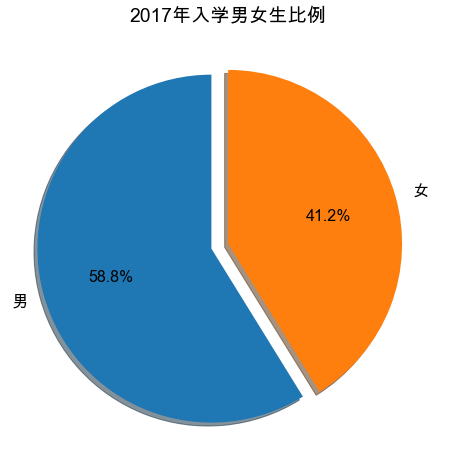

In [21]:
# 操作代码
sexes = students_info[:, 2]
male_count = len(sexes[sexes=='男'])
female_count = len(sexes[sexes=='女'])

labels = ['男', '女']
data = [male_count, female_count]

plt.figure(figsize=(8, 8))
plt.rc('font', size=16, family='Arial Unicode MS')

plt.pie(data, explode=[0.1, 0], labels=labels, autopct='%3.1f%%', startangle=90, shadow=True)

plt.title('2017年入学男女生比例')
plt.savefig('2017年入学男女生比例.png')

plt.show()

#### 第4题 （难易程度：**）

统计**学生信息表中**不同班级的男生人数和女生人数，并绘制堆叠式柱状图，男生显示为绿色，女生显示为红色。横坐标为班级名称，纵坐标为男女生人数。图表保存为"班级男女生人数对比.png"

In [22]:
# 操作代码
males = students_info[:,2]=='男'
mclasses = students_info[males][:, 3]
mclass_ids, mcounts = np.unique(mclasses, return_counts=True)

females = students_info[:,2]=='女'
fclasses = students_info[females][:, 3]
fclass_ids, fcounts = np.unique(fclasses, return_counts=True)
# 获取班级名称
class_names = classes_info[1:,1][mclass_ids.argsort()]
mcounts, fcounts, class_names

(array([ 8, 10,  7,  6,  8,  7, 11, 10, 13,  7,  6, 10,  8,  5,  5,  5,  5,
        10, 10, 10,  9,  6, 10,  8,  6,  7,  6,  7,  7, 10, 14, 11,  6,  5,
         6,  7,  4,  6,  5,  6,  9,  6,  9,  4,  5,  5,  8,  4, 10,  8, 11,
        11,  8,  7,  9,  9,  6, 11]),
 array([ 6,  4,  7,  8,  6,  7,  3,  3,  3,  5,  7,  2,  5,  7,  7,  9,  6,
         2,  2,  2,  4,  5,  2,  3,  5,  4,  6,  4,  5,  3,  2,  2,  9,  6,
         6,  6,  8,  6,  8,  8,  6,  6,  5,  8,  9,  7,  6,  9,  4,  4,  3,
         2,  5,  7,  6,  6, 12,  5]),
 array(['计算机一班', '计算机二班', '计算机三班', '智能科学一班', '智能科学二班', '智能科学三班', '智能科学四班',
        '软件工程一班', '软件工程二班', '软件工程三班', '数字图像处理一班', '数字图像处理二班', '数字图像处理三班',
        '网络计算一班', '网络计算二班', '网络计算三班', '信息工程一班', '信息工程二班', '信息工程三班',
        '管理科学与工程一班', '管理科学与工程二班', '管理科学与工程三班', '金融一班', '金融二班', '金融三班',
        '会计一班', '会计二班', '会计三班', '经济一班', '经济二班', '经济三班', '工商管理一班', '工商管理二班',
        '工商管理三班', '软件开发一班', '软件开发二班', '软件开发三班', '信息安全一班', '信息安全二班',
        '信息安全三班', '电子通信一班', '电子通信二班'

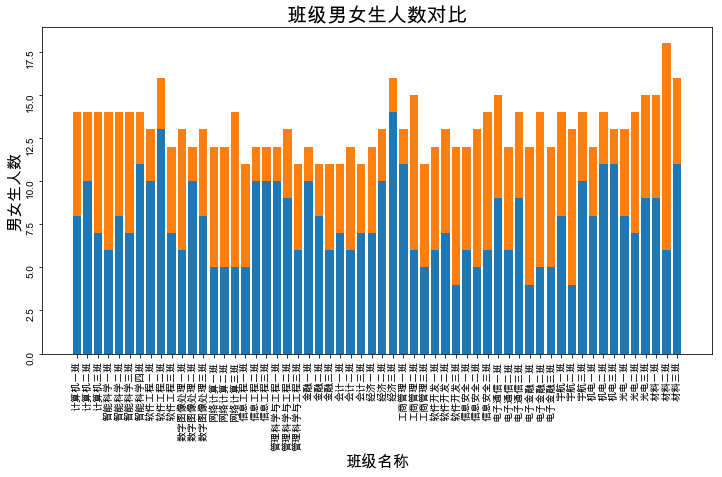

In [23]:
# 由于无法显示中文，采用班级编号，这里显示班级编号

plt.figure(figsize=(12, 6))
plt.rc('font', size=10, family='Arial Unicode MS')

p1 = plt.bar(class_names, mcounts)
p2 = plt.bar(class_names, fcounts, bottom=mcounts)

plt.xlabel('班级名称',fontsize=16)
plt.ylabel('男女生人数', fontsize=16)
plt.tick_params(labelrotation=90.0)

plt.title('班级男女生人数对比', fontsize=20)

plt.savefig('班级男女生人数对比.png')
plt.show()

#### 第5题 （难易程度：**）

绘制**学生入学成绩表**入学成绩的箱线图，在图表中以注解的形式显示中位数，最大值、最小值和异常值（如果有的话）

In [24]:
# 操作代码
scores = student_enrol_scores[1:, 5].astype('f4')
score_median = np.percentile(scores, 50)
score_max = np.max(scores)
score_min = np.min(scores)
score_median, score_max, score_min

(432.0, 677.0, 53.0)

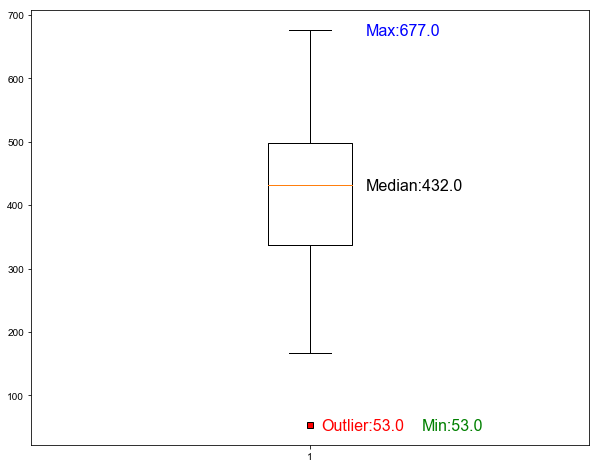

In [25]:
plt.figure(figsize=(10, 8))

red_square = dict(markerfacecolor='r', marker='s')

p = plt.boxplot(scores, flierprops=red_square)

outliers = p['fliers'][0].get_ydata()
min_outlier = min(outliers)

plt.text(1.1, score_max - 8, 'Max:{}'.format(score_max), color='b', fontsize=16)
plt.text(1.2, score_min - 8, 'Min:{}'.format(score_min), color='g', fontsize=16)
plt.text(1.1, score_median - 8, 'Median:{}'.format(score_median), color='k', fontsize=16)
plt.text(1.02, min_outlier - 8, 'Outlier:{}'.format(min_outlier), color='r', fontsize=16)

plt.show()

#### 第6题 （难易程度：**）

**学生信息表**中的学号存在大量重复，请将这些重复学号的中间4位替换为相应的班级编号。替换后的学生信息表保存为"学生信息表-6.csv"

In [26]:
# 获得重复学号的索引
student_ids = students_info[1:, 0]
_, u_indices = np.unique(student_ids, return_index=True)
dup_indices = np.setdiff1d(np.arange(student_ids.shape[0]), u_indices)
student_ids.shape, u_indices.shape, dup_indices.shape

((760,), (150,), (610,))

In [27]:
# 根据对应的班级编号创建新的学号
ids_left = np.char.ljust(student_ids[dup_indices], 4) 
ids_center = students_info[1:, 3][dup_indices]
ids_right = np.array([s[-4:] for s in student_ids[dup_indices]])
ids_new = np.char.add(ids_left, ids_center)
ids_new = np.char.add(ids_new, ids_right)
# 替换
students_info[1:, 0][dup_indices] = ids_new
# 存储
np.savetxt('学生信息表-6.csv',students_info, fmt='%s', delimiter=',')
!cat 学生信息表-6.csv | tail -n 10

170403011103,黎世顺,男,0206,20170901
170403011104,王春香,女,0207,20170901
170403011105,罗印,男,0208,20170901
170403011106,文富艳,男,0209,20170901
170403011107,杨冰凤,女,0210,20170901
170403011108,陈港,女,0211,20170901
170403011109,黄红梅,女,0212,20170901
170403011110,向跃进,男,0213,20170901
170403011111,朱兴愿,女,0214,20170901
170403011112,黎绚婷,女,0215,20170901


#### 第7题  （难易程度：**）

结合**班级信息表**和**学生信息表**，统计不同院系的入学人数，并绘制条形图，其中横坐标为入学人数，纵坐标为院系名称，标题为“院系入学人数”。图表保存为“2017院系入学人数-7.png"文件。

In [30]:
# 操作代码
# 先利用学生信息表统计每个班级的学生人数
_, stu_counts = np.unique(students_info[1:, 3], return_counts=True)
# 在利用班级信息表统计不同院系的班级数
dep_names, class_counts = np.unique(classes_info[1:, 3], return_counts=True)

# 统计不同院系的入学人数
# 注：大家可以对此函数进行泛化，能够应对任何类似这种跨表统计的情况
# 这里定义函数仅仅是为了避免重复，但泛化程度差，复用率低。下题和本题类似，故可以复用此函数。
def dep_stu_counts(stu_counts, class_counts):
    dep_stu_counts = []

    from_index = 0
    for class_count in class_counts:
        stu_count = np.sum(stu_counts[from_index:from_index + class_count])
        dep_stu_counts.append(stu_count)
        from_index = from_index + class_count
    
    return dep_stu_counts

dept_counts = dep_stu_counts(stu_counts, class_counts)

dep_names, class_counts, dept_counts

(array(['信息科学技术学院', '经济管理学院', '计算机学院', '软件与微电子学院'], dtype='<U9'),
 array([12, 15, 19, 12]),
 [164, 179, 246, 171])

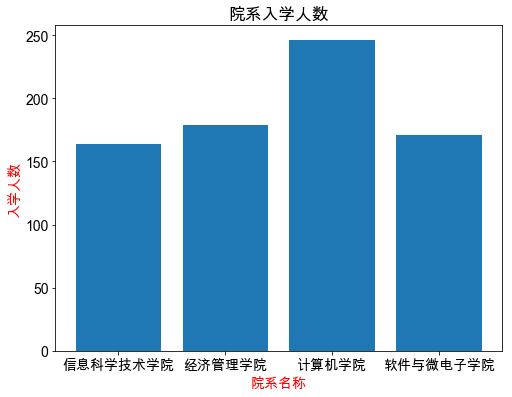

In [31]:
# 绘图
plt.figure(figsize=(8, 6))
plt.rc('font', size=14, family='Arial Unicode MS')

plt.bar(dep_names, dept_counts)

plt.title('院系入学人数')
plt.xlabel('院系名称', color='r')
plt.ylabel('入学人数', color='r')

plt.show()

#### 第8题 （难易程度：**）

结合**班级信息表**和**学生信息表**统计**不同院系**的入学男女生人数，并绘制堆叠式柱状图。

In [32]:
# 先把常用的代码封装为函数，后面可能重复使用
def order_by(array2d, col_index):
    sorted_indices = np.argsort(array2d[:, col_index])
    return array2d[:, sorted_indices]

def value_counts(array2d, col_index):
    values, counts = np.unique(array2d[:, col_index], return_counts=True)
    return np.hstack((values.reshape(-1,1), counts.reshape(-1,1)))

In [33]:
# 操作代码
# 先男女拆分
male_students = students_info[students_info[:,2]=='男']
female_students = students_info[students_info[:,2]=='女']
male_students.shape, female_students.shape

((447, 5), (313, 5))

In [34]:
male_counts_by_class = value_counts(male_students, 3)
female_counts_by_class = value_counts(female_students, 3)
class_counts_by_dep = value_counts(classes_info[1:,], 3)
class_counts_by_dep

array([['信息科学技术学院', '12'],
       ['经济管理学院', '15'],
       ['计算机学院', '19'],
       ['软件与微电子学院', '12']], dtype='<U21')

In [35]:
male_counts_by_dep = dep_stu_counts(male_counts_by_class[:,1].astype('i4'), 
                                    class_counts_by_dep[:,1].astype('i4'))
female_counts_by_dep = dep_stu_counts(female_counts_by_class[:,1].astype('i4'),
                                    class_counts_by_dep[:,1].astype('i4'))
male_counts_by_dep, female_counts_by_dep

([103, 110, 132, 102], [61, 69, 114, 69])

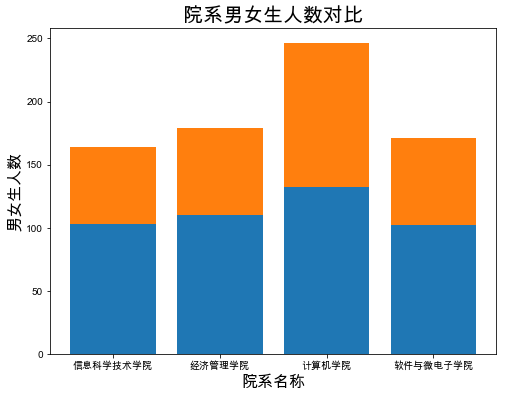

In [36]:
# 绘图
plt.figure(figsize=(8, 6))
plt.rc('font', size=10, family='Arial Unicode MS')

dep_names = class_counts_by_dep[:,0]

p1 = plt.bar(dep_names, male_counts_by_dep)
p2 = plt.bar(dep_names, female_counts_by_dep, bottom=male_counts_by_dep)

plt.xlabel('院系名称',fontsize=16)
plt.ylabel('男女生人数', fontsize=16)

plt.title('院系男女生人数对比', fontsize=20)

plt.savefig('院系男女生人数对比.png')
plt.show()

#### 第9题 （难易程度：** ）

将**学生信息表**和**学生成绩表**合并为一张新表，**保留**没有对应成绩的行，合并后缺失的成绩通过**随机选取**的方式从前面具有成绩的行中选取并填充缺失值。新表保存为"学生成绩表-9.csv"。

In [37]:
# 操作代码
print(students_info.shape, students_scores.shape)
print(students_info[0,:], students_scores[0,:])

(761, 5) (128, 5)
['学号' '姓名' '性别' '所属班级编号' '入学日期'] ['学号' '姓名' '性别' '所属班级编号' '入学成绩']


In [38]:
rnd_indices = np.random.randint(1, 128, size=(len(students_info) - len(students_scores),))
rnd_scores = students_scores[:, 4][rnd_indices]
new_scores = np.concatenate((students_scores[:,4], rnd_scores))
student_scores_new = np.concatenate((students_info, new_scores.reshape(-1,1)), axis=1)
np.savetxt('学生成绩表-9.csv', student_scores_new, fmt='%s', delimiter=',')
!cat 学生成绩表-9.csv | tail -n 10

170403011103,黎世顺,男,0206,20170901,358
170403011104,王春香,女,0207,20170901,437
170403011105,罗印,男,0208,20170901,501
170403011106,文富艳,男,0209,20170901,499
170403011107,杨冰凤,女,0210,20170901,348
170403011108,陈港,女,0211,20170901,356
170403011109,黄红梅,女,0212,20170901,340
170403011110,向跃进,男,0213,20170901,274
170403011111,朱兴愿,女,0214,20170901,447
170403011112,黎绚婷,女,0215,20170901,287


#### 第10题 （难易程度：**）

在第9题操作的基础上：

1. 计算**新表**中学生成绩的均值，方差、标准差和中位数
2. 绘制**新表**和**学生入学成绩表**入学成绩的箱线图，比较二者成绩分布的差异，以了解上述成绩填充的方式是否合理。图表标题为"成绩分布对比"，保存为"成绩分布对比-10.png"。

In [39]:
# 操作代码
print('均值：{:.2f}'.format(new_scores[1:].astype('f4').mean()))
print('方差：{:.2f}'.format(new_scores[1:].astype('f4').var()))
print('标准差：{:.2f}'.format(new_scores[1:].astype('f4').std()))
print('中位数：', np.median(new_scores[1:].astype('f4')))

均值：406.62
方差：9371.37
标准差：96.81
中位数： 431.0


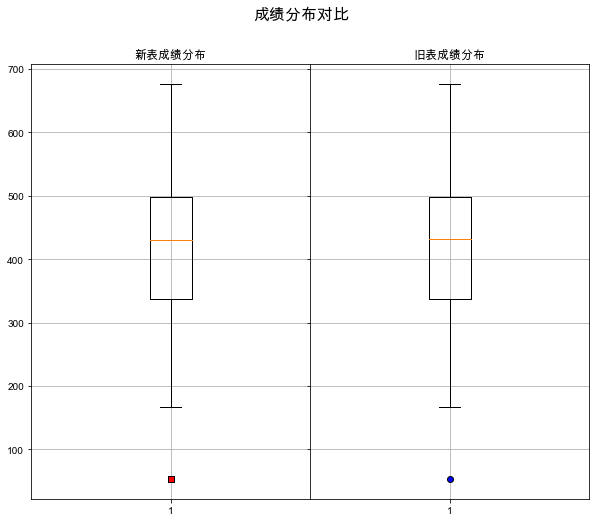

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

red_square = dict(markerfacecolor='r', marker='s')
blue_circle = dict(markerfacecolor='b', marker='o')

ax1.boxplot(new_scores[1:].astype('f4'), flierprops=red_square)

ax2.boxplot(students_scores[1:, 4].astype('f4'), flierprops=blue_circle)

ax1.grid()
ax1.set_title('新表成绩分布')
ax2.grid()
ax2.set_title('旧表成绩分布')

plt.subplots_adjust(wspace=0)
plt.suptitle('成绩分布对比',fontsize=16)
plt.savefig('成绩分布对比-10.png')

plt.show()

#### 第11题 （难易程度：**）

在第9题操作的基础上：

1. 输出**新表**入学成绩最高和最低的学生姓名、所属班级和院系名称。注：若存在多个，则全部输出
2. 将**新表**和**班级信息表**连接为完整的**新生入学成绩表**，并保存为"新生入学成绩表-11.csv"文件

In [41]:
# 操作代码
new_scores = new_scores[1:,].astype('i4')
score_min = new_scores.min()
score_max = new_scores.max()
score_min, score_max

(53, 677)

In [42]:
students_min = student_scores_new[1:,][new_scores == score_min]
students_max = student_scores_new[1:,][new_scores == score_max]
students_min, students_max

(array([['170402011055', '陈美文', '男', '0106', '20170901', '53'],
        ['170401231127', '吴玉梅', '男', '0123', '20170901', '53']],
       dtype='<U13'),
 array([['170403011064', '骆青', '男', '0107', '20170901', '677'],
        ['170401291099', '史欢', '女', '0129', '20170901', '677'],
        ['170402191107', '罗建雄', '男', '0219', '20170901', '677'],
        ['170402111114', '张伟', '男', '0211', '20170901', '677'],
        ['170401151102', '许春梅', '女', '0115', '20170901', '677'],
        ['170401131116', '蒲绍缔', '男', '0113', '20170901', '677']],
       dtype='<U13'))

In [62]:
# 如果从第2题之前就定义此函数，可节约一半的时间
def array_left_join(arr_left, arr_right, left_on, right_on, has_header=True):
    '''
    简单的数组左连接函数
    :param arr_left 主表（二维数组）
    :param arr_right 外表（引用表）
    :param left_on 主表外键列索引
    :param right_on 外部主键列索引
    :param has_header 是否包含表头(可选，默认为True)
    :return 连接后的宽表
    '''
    rows_joined = []
    if has_header:
        header = np.append(arr_left[0], arr_right[0])
        rows_joined.append(header)
        arr_left = arr_left[1:]
        arr_right = arr_right[1:]
    for row in arr_left:
        selection = arr_right[:, right_on] == row[left_on]
        row_joined = np.append(row, arr_right[selection])
        rows_joined.append(row_joined)
    return np.array(rows_joined)

In [61]:
students_min_joined = array_left_join(students_min, classes_info, 3, 0, has_header=False)
students_max_joined = array_left_join(students_max, classes_info, 3, 0, has_header=False)
print('-' * 15 + '成绩最低的学生信息' + '-' * 15)
print(students_min_joined[:, [1, 7, 9, 5]])
print('-' * 15 + '成绩最高的学生信息' + '-' * 15)
print(students_max_joined[:, [1, 7, 9, 5]])

---------------成绩最低的学生信息---------------
[['陈美文' '智能科学三班' '计算机学院' '53']
 ['吴玉梅' '金融一班' '经济管理学院' '53']]
---------------成绩最高的学生信息---------------
[['骆青' '智能科学四班' '计算机学院' '677']
 ['史欢' '经济一班' '经济管理学院' '677']
 ['罗建雄' '宇航三班' '信息科学技术学院' '677']
 ['张伟' '电子通信一班' '软件与微电子学院' '677']
 ['许春梅' '网络计算二班' '计算机学院' '677']
 ['蒲绍缔' '数字图像处理三班' '计算机学院' '677']]


In [66]:
student_enrol_scores_full = array_left_join(student_scores_new, classes_info, 3, 0)
# 保存之前应该删除重复列
student_enrol_scores_full = np.delete(student_enrol_scores_full, [3, 8], axis=1)
np.savetxt('新生入学成绩表-11.csv', student_enrol_scores_full, fmt='%s', delimiter=',')
!cat 新生入学成绩表-11.csv | head -n 10

学号,姓名,性别,入学日期,入学成绩,班级编号,班级名称,所属院系中文名
170401011001,施礼义,男,20170901,467,0101,计算机一班,计算机学院
170401011002,王旭,男,20170901,518,0101,计算机一班,计算机学院
170401011003,肖桢,女,20170901,509,0101,计算机一班,计算机学院
170401011004,吴佩东,男,20170901,508,0101,计算机一班,计算机学院
170401011005,魏会,男,20170901,494,0101,计算机一班,计算机学院
170401011006,曾美,女,20170901,500,0101,计算机一班,计算机学院
170401011007,邵亚,女,20170901,490,0101,计算机一班,计算机学院
170401011008,朱燕菊,女,20170901,466,0101,计算机一班,计算机学院
170401011009,杨明书,男,20170901,534,0101,计算机一班,计算机学院


#### 第12题 （难易程度：**）

在第11题操作的基础上：

1. 将完整的**新生入学成绩表**按照院系拆分4个表，分别保存为形如"<院系名称>入学成绩表-12.csv"的文件

In [67]:
# 操作代码
departments_info

array([['院系编号', '院系名称'],
       ['01', '计算机学院'],
       ['02', '经济管理学院'],
       ['03', '软件与微电子学院'],
       ['04', '信息科学技术学院']], dtype='<U8')

In [82]:
header = student_enrol_scores_full[0]
for department in departments_info[1:]:
    splited = student_enrol_scores_full[1:][student_enrol_scores_full[1:,7]==department[1]]
    splited = np.vstack((header, splited))
    np.savetxt('{}入学成绩表-12.csv'.format(department[1]), splited, fmt='%s', delimiter=',')
    print('-' * 25 + '{}({}人)'.format(department[1], len(splited)) + '-' * 25)
    print(splited)

-------------------------计算机学院(251人)-------------------------
[['学号' '姓名' '性别' ... '班级编号' '班级名称' '所属院系中文名']
 ['170401011001' '施礼义' '男' ... '0101' '计算机一班' '计算机学院']
 ['170401011002' '王旭' '男' ... '0101' '计算机一班' '计算机学院']
 ...
 ['170401171120' '王伟' '女' ... '0117' '信息工程一班' '计算机学院']
 ['170401181121' '胡蓉' '女' ... '0118' '信息工程二班' '计算机学院']
 ['170401191122' '邵宝' '男' ... '0119' '信息工程三班' '计算机学院']]
-------------------------经济管理学院(185人)-------------------------
[['学号' '姓名' '性别' ... '班级编号' '班级名称' '所属院系中文名']
 ['170401201103' '邓云' '男' ... '0120' '管理科学与工程一班' '经济管理学院']
 ['170401201104' '胡雪' '女' ... '0120' '管理科学与工程一班' '经济管理学院']
 ...
 ['170403011099' '潘林' '男' ... '0202' '工商管理一班' '经济管理学院']
 ['170403011100' '刘伟' '男' ... '0203' '工商管理二班' '经济管理学院']
 ['170403011101' '杨佳威' '男' ... '0204' '工商管理三班' '经济管理学院']]
-------------------------软件与微电子学院(156人)-------------------------
[['学号' '姓名' '性别' ... '班级编号' '班级名称' '所属院系中文名']
 ['170402051119' '葛军' '男' ... '0205' '软件开发一班' '软件与微电子学院']
 ['170402051120' '叶龙' '男' ... '0205' '软件开

2. 将完整的**新生入学成绩表**按入学成绩的**中位数**将**新表**拆分为两个表，分别保存为"学生成绩表-高于中等-12.csv"和"学生成绩表-低于中等-12.csv"文件

In [103]:
scores = student_enrol_scores_full[1:, 4].astype('i2')
median = np.median(scores)

def split_scores(scores, ref_score, fname1, fname2):
    t1 = student_enrol_scores_full[1:][scores > ref_score]
    t2 = student_enrol_scores_full[1:][scores < ref_score]
    np.savetxt(fname1, t1, fmt='%s', delimiter=',')
    np.savetxt(fname2, t2, fmt='%s', delimiter=',')
    print('-'* 20 + fname1 + '({:.1f},{}人)'.format(ref_score, len(t1)) + '-'* 20)
    print(t1[:11])
    print('-'* 20 + fname2 + '({:.1f},{}人)'.format(ref_score, len(t2)) + '-'* 20)
    print(t2[:11])

split_scores(scores, median, '学生成绩表-高于中等-12.csv', '学生成绩表-低于中等-12.csv')

--------------------学生成绩表-高于中等-12.csv(431.0,367人)--------------------
[['170401011001' '施礼义' '男' '20170901' '467' '0101' '计算机一班' '计算机学院']
 ['170401011002' '王旭' '男' '20170901' '518' '0101' '计算机一班' '计算机学院']
 ['170401011003' '肖桢' '女' '20170901' '509' '0101' '计算机一班' '计算机学院']
 ['170401011004' '吴佩东' '男' '20170901' '508' '0101' '计算机一班' '计算机学院']
 ['170401011005' '魏会' '男' '20170901' '494' '0101' '计算机一班' '计算机学院']
 ['170401011006' '曾美' '女' '20170901' '500' '0101' '计算机一班' '计算机学院']
 ['170401011007' '邵亚' '女' '20170901' '490' '0101' '计算机一班' '计算机学院']
 ['170401011008' '朱燕菊' '女' '20170901' '466' '0101' '计算机一班' '计算机学院']
 ['170401011009' '杨明书' '男' '20170901' '534' '0101' '计算机一班' '计算机学院']
 ['170401011010' '张伟' '男' '20170901' '507' '0101' '计算机一班' '计算机学院']
 ['170401011011' '张宁波' '男' '20170901' '479' '0102' '计算机二班' '计算机学院']]
--------------------学生成绩表-低于中等-12.csv(431.0,374人)--------------------
[['170401011016' '周鹏琼' '女' '20170901' '425' '0102' '计算机二班' '计算机学院']
 ['170401011018' '黄城' '男' '20170901' '383' '0102'

3. 将完整的**新生入学成绩表**按入学成绩的**均值**将**新表**拆分为两个表，分别保存为"学生成绩表-高于平均-12.csv"和"学生成绩表-低于平均-12.csv"文件

In [102]:
scores = student_enrol_scores_full[1:, 4].astype('i2')
mean = np.mean(scores)

split_scores(scores, mean, '学生成绩表-高于平均-12.csv', '学生成绩表-低于平均-12.csv')

--------------------学生成绩表-高于平均-12.csv(406.62,437人)--------------------
[['170401011001' '施礼义' '男' '20170901' '467' '0101' '计算机一班' '计算机学院']
 ['170401011002' '王旭' '男' '20170901' '518' '0101' '计算机一班' '计算机学院']
 ['170401011003' '肖桢' '女' '20170901' '509' '0101' '计算机一班' '计算机学院']
 ['170401011004' '吴佩东' '男' '20170901' '508' '0101' '计算机一班' '计算机学院']
 ['170401011005' '魏会' '男' '20170901' '494' '0101' '计算机一班' '计算机学院']
 ['170401011006' '曾美' '女' '20170901' '500' '0101' '计算机一班' '计算机学院']
 ['170401011007' '邵亚' '女' '20170901' '490' '0101' '计算机一班' '计算机学院']
 ['170401011008' '朱燕菊' '女' '20170901' '466' '0101' '计算机一班' '计算机学院']
 ['170401011009' '杨明书' '男' '20170901' '534' '0101' '计算机一班' '计算机学院']
 ['170401011010' '张伟' '男' '20170901' '507' '0101' '计算机一班' '计算机学院']
 ['170401011011' '张宁波' '男' '20170901' '479' '0102' '计算机二班' '计算机学院']]
--------------------学生成绩表-低于平均-12.csv(406.62,323人)--------------------
[['170401011018' '黄城' '男' '20170901' '383' '0102' '计算机二班' '计算机学院']
 ['170401011019' '颜旺' '男' '20170901' '352' '0102